## Support Vector Machine

In [3]:
# Import required packages
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

import matplotlib.pyplot as plt
import seaborn as sns
# Note: RandomUnderSampler removed due to compatibility issues
# Using custom undersampling function instead
%matplotlib inline

In [4]:
rs = 123

In [5]:
# Load dataset
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/food_items_binary.csv"
food_df = pd.read_csv(dataset_url)

In [6]:
food_df.head()

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0,0
1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0,0
2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0,0
3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,0
4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0,0


In [7]:
X = food_df.iloc[:,:-1]
y = food_df.iloc[:,-1:]

In [8]:
X.describe()

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron
count,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000
mean,105.098835,2.318235,0.368920,0.309216,0.264116,0.007069,4.308679,235.053659,15.510719,1.806074,3.734756,0.059039,4.298975,6.636733,6.487237,3.937688,5.510014
std,77.224368,3.438941,0.737164,1.310260,2.848250,0.094783,14.788162,252.438163,14.028570,4.099947,5.013685,0.771173,5.349881,19.658111,19.566500,7.892694,9.855960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,3.700000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000
50%,100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,13.000000,1.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,140.000000,3.000000,0.500000,0.000000,0.000000,0.000000,0.000000,375.500000,24.000000,3.000000,5.000000,0.000000,6.000000,6.000000,4.000000,4.000000,8.000000
max,2210.000000,24.000000,8.000000,16.800000,235.000000,2.500000,450.000000,2220.000000,270.000000,305.000000,39.000000,19.000000,70.000000,370.000000,280.000000,110.000000,100.000000


In [10]:
# Get the row entries with the last col "class"
y.value_counts(normalize=True)

class
0        0.870402
1        0.129598
Name: proportion, dtype: float64

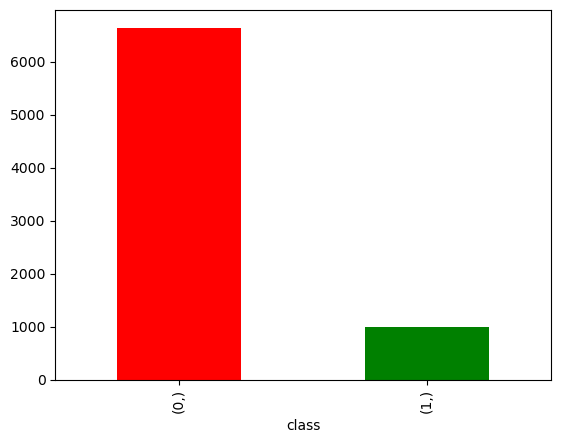

In [11]:
y.value_counts().plot.bar(color=['red','green'])
plt.show()

## Build a SVM model with default parameters

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2 , stratify=y, random_state = rs)

In [13]:
model = SVC()

In [14]:
model.fit(X_train,y_train.values.ravel())

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [23]:
preds = model.predict(X_test)

In [24]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [25]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9568062827225131,
 'recall': 0.7727272727272727,
 'precision': 0.8793103448275862,
 'f1score': 0.8225806451612904}

## Train SVM with different regularization parameters and kernels
- The SVC model provided by sklearn has two important arguments to be tuned: regularization parameter C and kernel.
- The C argument is a regularization parameter that controls the trade-off between achieving a low training error and keeping the decision boundary as simple as possible.
- For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly, which may cause the model to overfit.
- Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points, but potentially better generalization to unseen data.
- The kernel argument specifies the kernel to be used for transforming features to higher-dimensional spaces, some commonly used non-linear kernels are:
- rbf: Gaussian Radial Basis Function (RBF)
poly: Polynomial Kernel
sigmoid: Sigmoid Kernel

In [28]:
## let's try C= 10 and kernel = 'rbf'
model = SVC(C=10, kernel = 'rbf')
model.fit(X_train,y_train.values.ravel())
preds = model.predict(X_test)
evaluate_metrics(y_test,preds)

{'accuracy': 0.9679319371727748,
 'recall': 0.8333333333333334,
 'precision': 0.9116022099447514,
 'f1score': 0.8707124010554089}

## Try different C values and kernels to see which combination produces SVM models with better classification performance

In [29]:
params_grid = { 'C': [1,10,100],
               'kernel': ['poly','rbf','sigmoid']}

In [30]:
model = SVC()

In [31]:
# Define a GridSearchCV to search the best parameters
grid_search = GridSearchCV(estimator = model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
# Search the best parameters with training data
grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [33]:
best_params

{'C': 100, 'kernel': 'rbf'}

In [34]:
model = SVC(C=100, kernel='rbf')
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.9698952879581152,
 'recall': 0.8787878787878788,
 'precision': 0.8877551020408163,
 'f1score': 0.883248730964467}

## Plot SVM hyper plane and margin

In [35]:
simplified_food_df = food_df[['Calories', 'Dietary Fiber', 'class']]

In [36]:
X = simplified_food_df.iloc[:1000, :-1].values
y = simplified_food_df.iloc[:1000, -1:].values

In [39]:
# Custom undersampling function to replace RandomUnderSampler
def custom_undersample(X, y, random_state=123):
    """
    Simple undersampling function to balance classes
    """
    np.random.seed(random_state)
    
    # Convert to proper format
    if len(y.shape) > 1:
        y_flat = y.ravel()
    else:
        y_flat = y
    
    # Get unique classes and their counts
    unique_classes, counts = np.unique(y_flat, return_counts=True)
    min_count = min(counts)
    
    # Sample equal number from each class
    balanced_indices = []
    
    for class_label in unique_classes:
        class_indices = np.where(y_flat == class_label)[0]
        sampled_indices = np.random.choice(class_indices, min_count, replace=False)
        balanced_indices.extend(sampled_indices)
    
    # Shuffle the indices
    np.random.shuffle(balanced_indices)
    
    return X[balanced_indices], y_flat[balanced_indices]

In [40]:
# Use custom undersampling function instead of RandomUnderSampler
X_under, y_under = custom_undersample(X, y, random_state=rs)

In [41]:
# Check the results of undersampling
print("Original dataset shape:", X.shape, y.shape)
print("Original class distribution:", np.unique(y, return_counts=True))
print("\nUndersampled dataset shape:", X_under.shape, y_under.shape)
print("Undersampled class distribution:", np.unique(y_under, return_counts=True))

Original dataset shape: (1000, 2) (1000, 1)
Original class distribution: (array([0, 1], dtype=int64), array([969,  31], dtype=int64))

Undersampled dataset shape: (62, 2) (62,)
Undersampled class distribution: (array([0, 1], dtype=int64), array([31, 31], dtype=int64))


In [42]:
print(f"Dataset resampled shape, X: {X_under.shape}, y: {y_under.shape}")

Dataset resampled shape, X: (62, 2), y: (62,)


In [43]:
scaler = MinMaxScaler()
X_under = scaler.fit_transform(X_under)

In [44]:
linear_svm = SVC(C=1000, kernel='linear')
linear_svm.fit(X_under, y_under)

,C,1000
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [49]:
# Create RBF kernel SVM model
svm_rbf_kernel = SVC(C=100, kernel='rbf')
svm_rbf_kernel.fit(X_under, y_under)

,C,100
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [50]:
def plot_decision_boundry(X, y, model):
    plt.figure(figsize=(16, 12))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(
        XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
    )

    # plot support vectors
    ax.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.show()

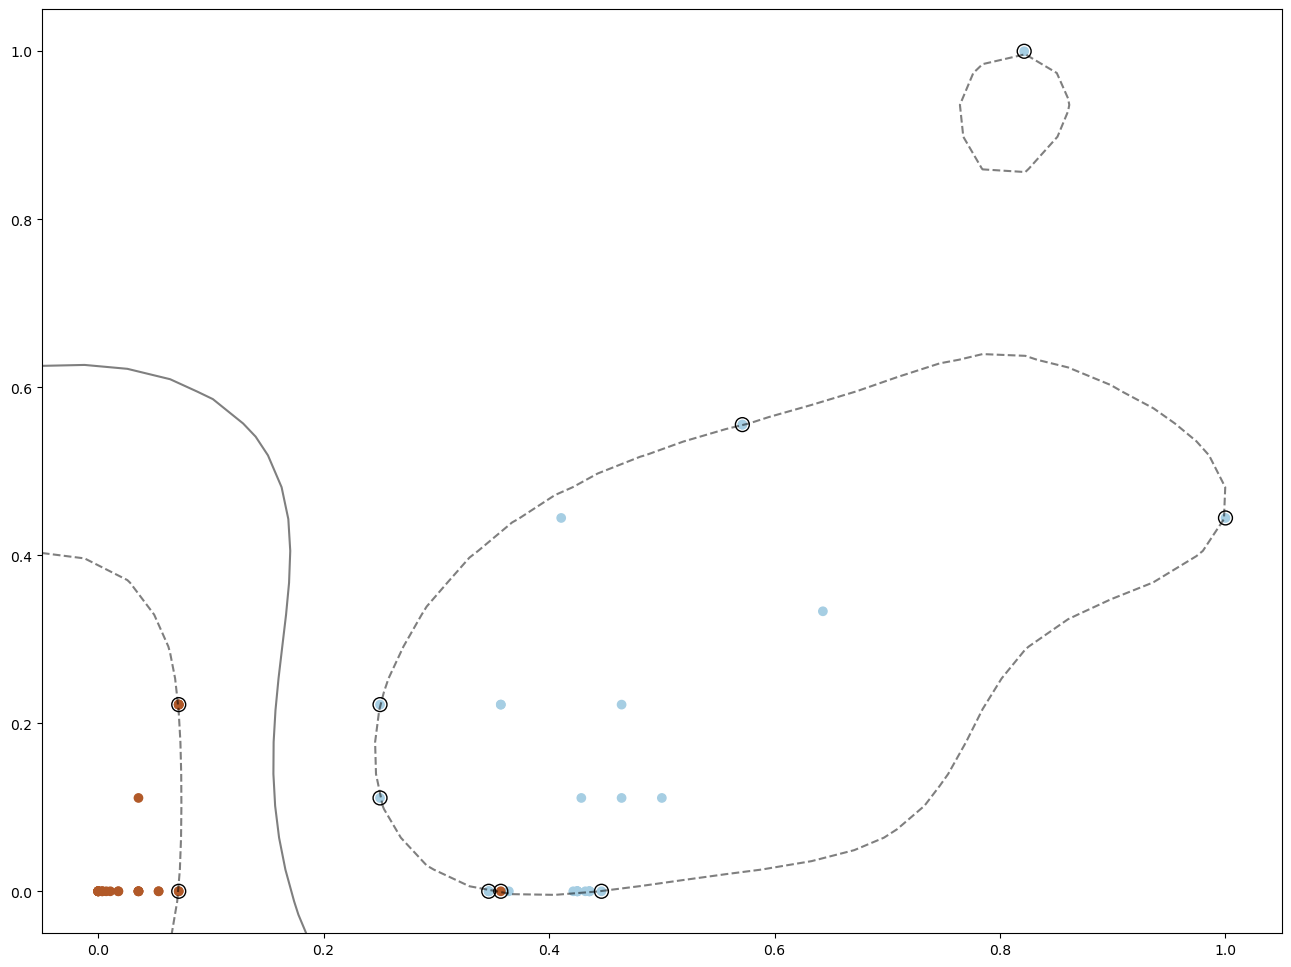

In [51]:
plot_decision_boundry(X_under, y_under, svm_rbf_kernel)

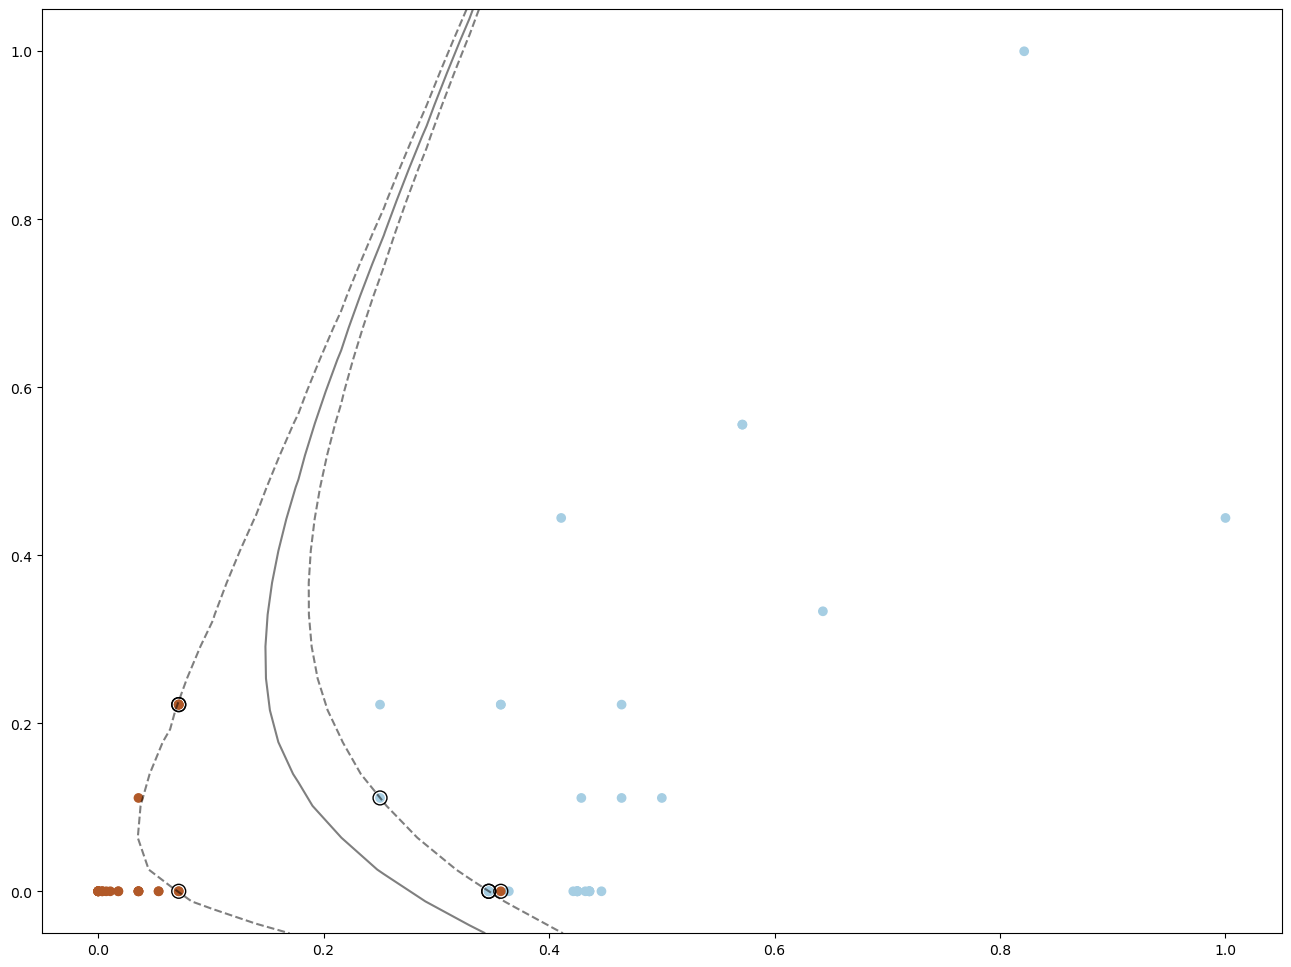

In [52]:
svm_rbf_kernel = SVC(C=100, kernel='poly')
svm_rbf_kernel.fit(X_under, y_under)
plot_decision_boundry(X_under, y_under, svm_rbf_kernel)